In [29]:
import logging
logging.basicConfig(level=logging.INFO, format=u"%(asctime)s [%(levelname)s]:%(filename)s, %(name)s, in line %(lineno)s >> %(message)s".encode('utf-8'))
logger = logging.getLogger("visualize caffe model")
import numpy as np
from google.protobuf import text_format

import caffe
import caffe.draw
from caffe.proto import caffe_pb2

from PIL import Image

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

import sys
import os

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (100.0, 80.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import platform
print(platform.python_version())

2.7.12


In [7]:
CAFFE_ROOT = "../caffe/"

def isfile(path):
    if os.path.isfile(path):
        logger.debug("%s is a valid file" % path)
        return True
    else:
        logger.debug("%s is not a valid file" % path)
        return False
    
model_def = os.path.join(CAFFE_ROOT, "apollo", "deploy.prototxt")
if not isfile(model_def):
    logger.debug("The caffe model %s is not found!" % model_def)
    exit(0)

caffe.set_mode_gpu()
caffe.set_device(0)
    
net = caffe_pb2.NetParameter()
text_format.Merge(open(model_def).read(), net)
rankdir = 'BT'

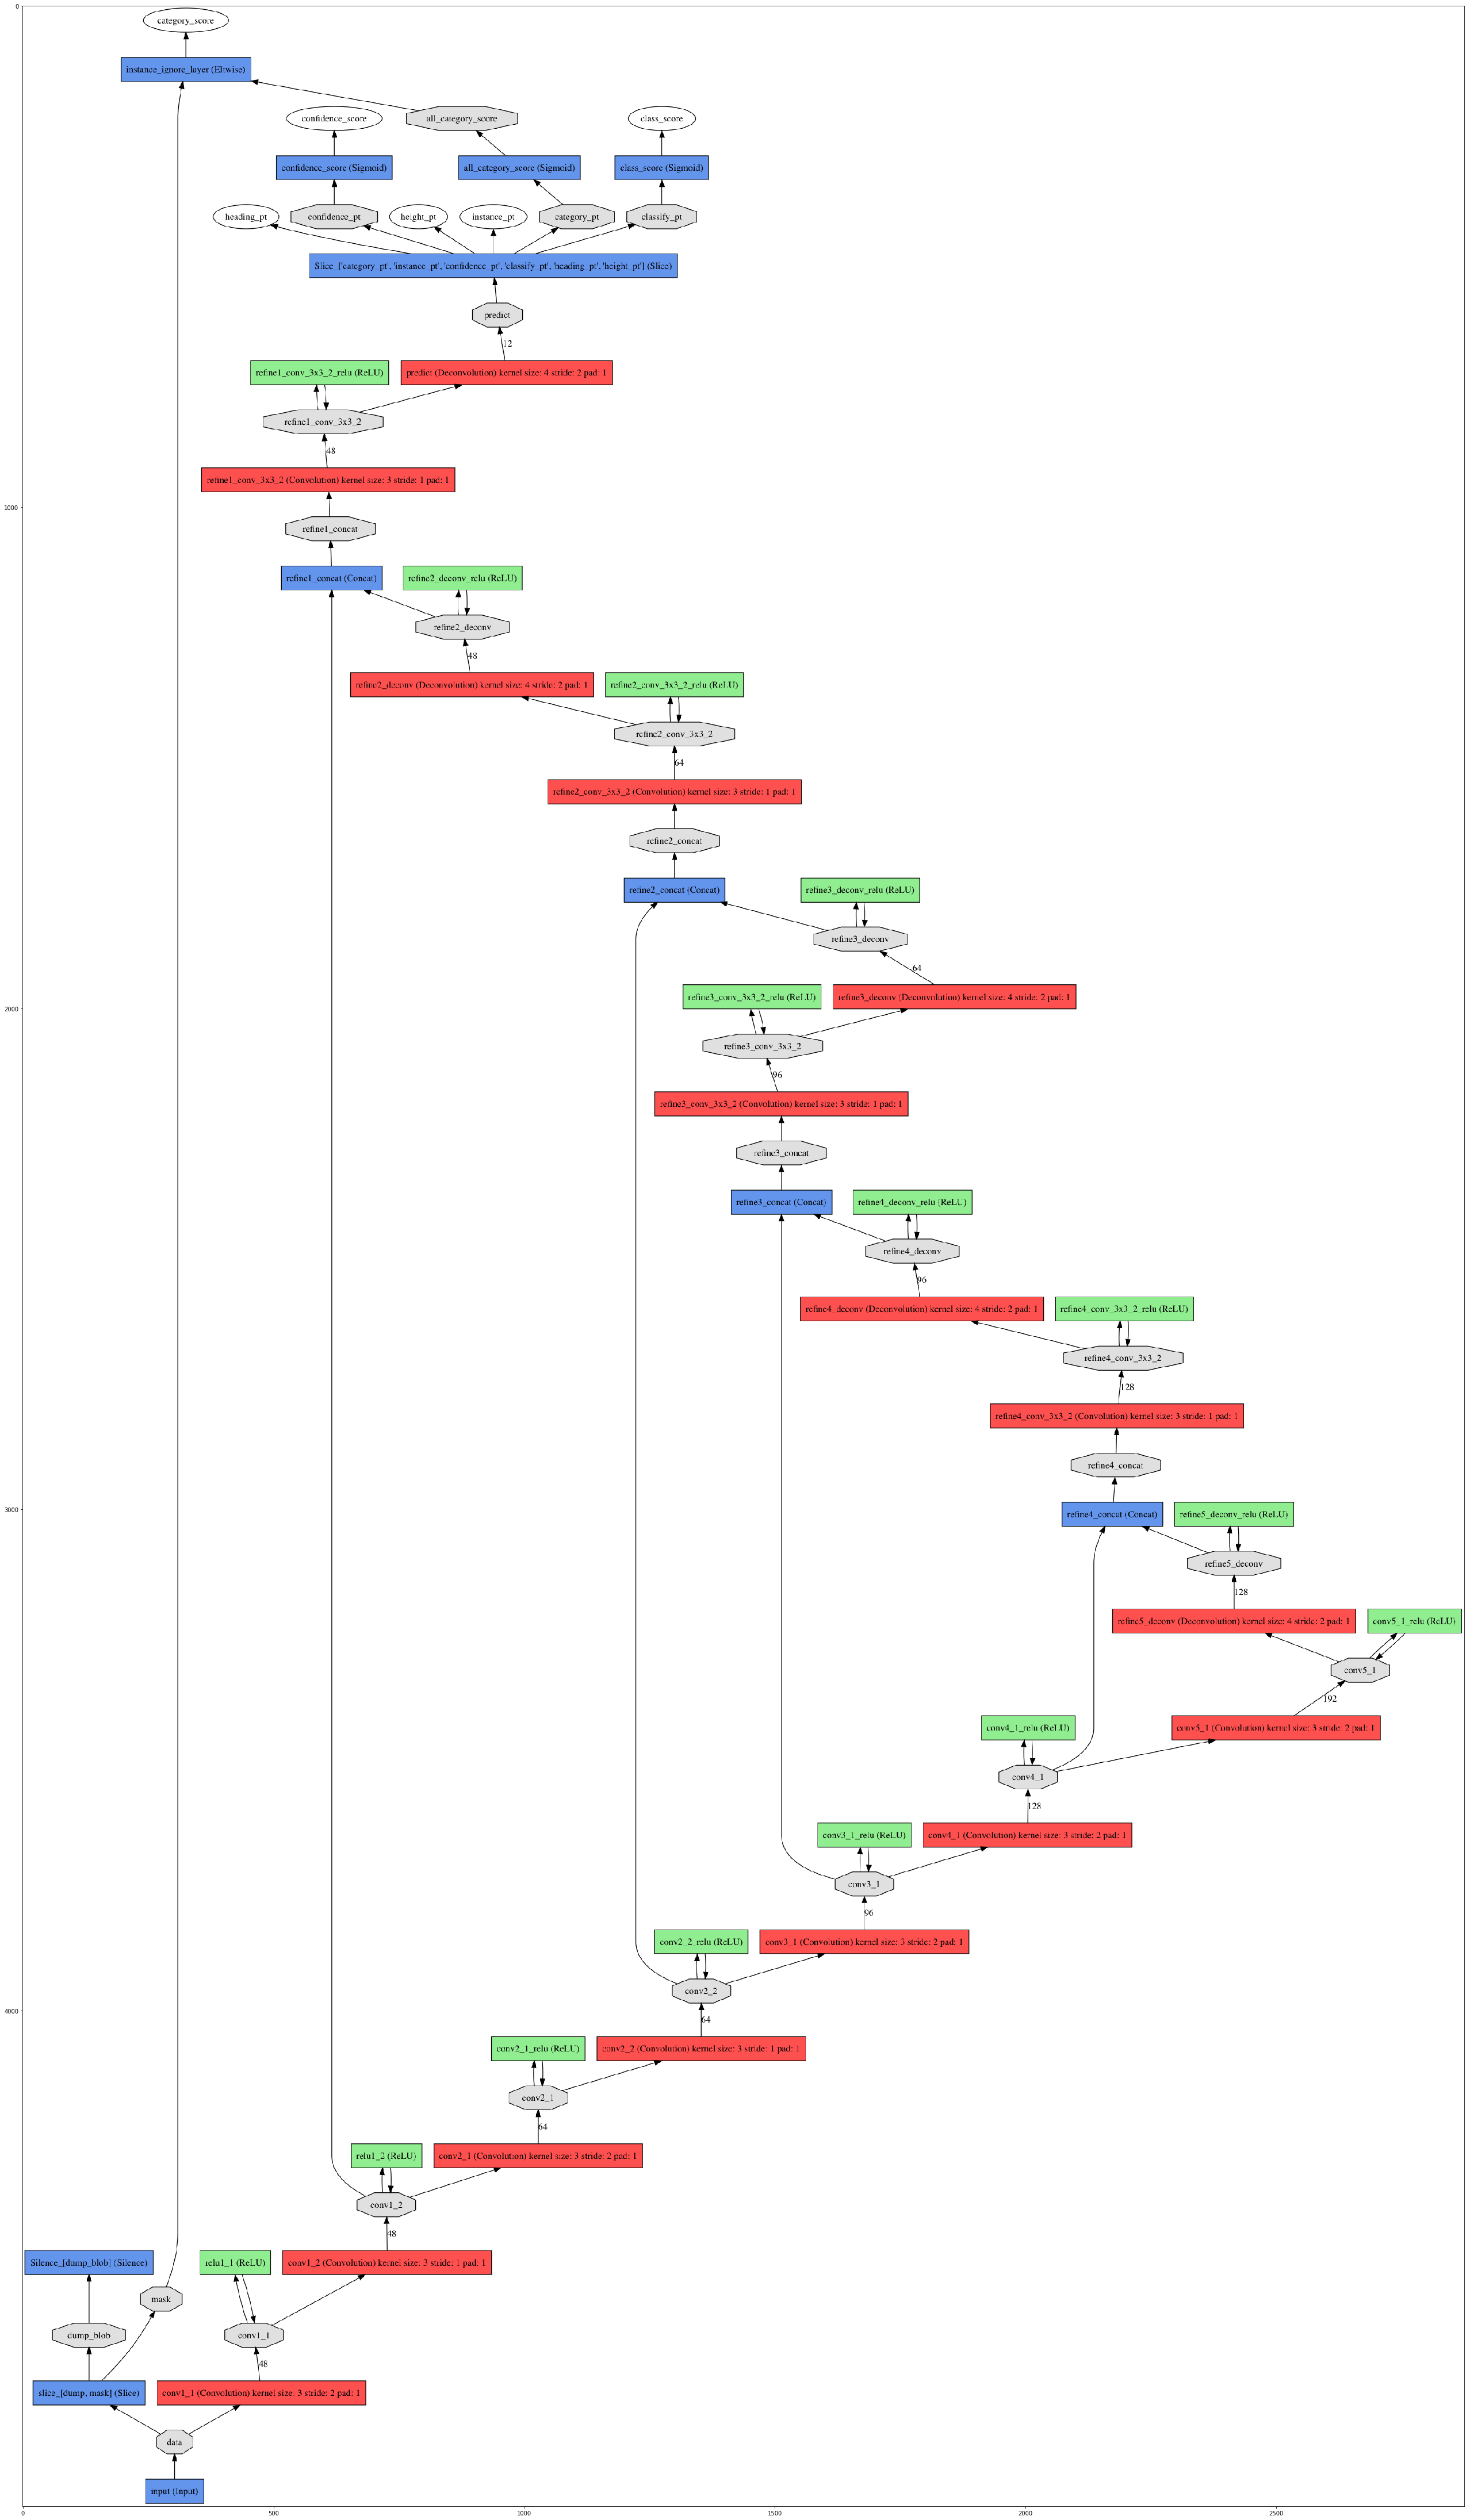

In [30]:
# caffe.draw.draw_net(net, rankdir, phase=caffe.TEST)
caffe.draw.draw_net_to_file(net, 'network.png', rankdir=rankdir, phase=caffe.TEST)
img = Image.open('network.png')
plt.figure()
plt.imshow(img)